
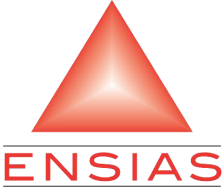




#**Rapport Travaux pratiques DataDriven**

Deuxième année filière Génie Logiciel

École Nationale Supérieure d’Informatique et d’Analyse des Systèmes (ENSIAS)

###Rélisé par:  ETTAOUIL Oussama & BENZHA Marieme

###Professeur : Pr. Youness TABII


Abstract:


### I- L'algorithme de regression lineaire simple

L'algorithme de régression linéaire qu'on implémentera est basé sur la méthode des moindres carrés ordinaires (OLS), qui estime les coefficients du modèle de régression linéaire en minimisant la somme des carrés des différences entre les valeurs observées et prédites.

**1- Représentation du modèle :**

Le modèle de régression linéaire simple peut être représenté comme suit :
<center>$y = ax + b + ε$ </center>

où :

$y$ est la variable dépendante (cible),

$x$ est la variable indépendante (caractéristique),

$b$​ est l'interception (biais),

$a$​ est la pente de la ligne,

$ε$ est le terme d'erreur.

<br>

**2- Fonction de coût :**

La fonction de coût à minimiser est la somme des carrés des différences entre les valeurs observées et prédites :
<center>$J(b, a) = \frac{1}{2m} \sum_{i=1}^{m} (hθ(x^{(i)}) - y^{(i)})^2$ </center>

$m$ est le nombre d'exemples d'entraînement,

$hθ(x)$ est la valeur prédite pour l'entrée $x$ donnée par $ax+b$ .

<br>

**3- Équation normale :**

L'équation normale fournit une solution en forme fermée pour les coefficients $a$ et $b$

<center>$ (b,a) = (X^TX)^{-1}X^Ty$ </center>

où :

$X$  est la matrice des caractéristiques (avec une colonne ajoutée de 1 pour le terme d'interception),

$y$ est le vecteur des valeurs cibles.

<br>

Une fois que les coefficients $b$​ et $a$​ ont été estimés, les prédictions peuvent être faites en utilisant l'équation de régression linéaire.

### II- Implementation de l'algorithme de regression lineaire simple



Ce code Python définit une classe LinearRegression qui effectue une régression linéaire simple en utilisant la méthode des moindres carrés. Il comporte des méthodes pour ajuster le modèle aux données et pour effectuer des prédictions.

La méthode *fit(self, X, y)* ajuste le modèle de régression linéaire aux données d'entraînement fournies, tandis que la méthode *predict(self, X)* utilise ce modèle pour effectuer des prédictions sur de nouvelles données.

In [ ]:
import numpy as np

class LinearRegression:
    def _init_(self):
        self.a = None
        self.b = None

    def fit(self, X, y):
        # Ajouter une colonne de 1 à X pour le terme constant
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Calculer les coefficients via la formule des moindres carrés
        b, a = np.linalg.inv(X.T @ X) @ X.T @ y
        self.a = a  # La pente 'a' est le coefficient de X
        self.b = b  # L'interception 'b' est le coefficient constant

    def predict(self, X):
        # Calculer les prédictions
        predictions = self.a * X + self.b
        return predictions

Voici un exemple avec une dataset créer en utilisant la bibliothèque numpy



In [ ]:
# Exemple d'utilisation
if __name__ == "__main__":
    # Données d'exemple
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([2, 4, 5, 4, 5])

    # Créer et entraîner le modèle
    model = LinearRegression()
    model.fit(X, y)

    # Faire des prédictions
    X_test = np.array([[6], [7]])
    predictions = model.predict(X_test)
    print("Prédictions:", predictions)

Prédictions: [[5.8]
 [6.4]]


### III- Le cas d'utilisation

Dans cette partie, notre étude se focalisera uniquement sur l'impact des dépenses publicitaires dans le canal de la radio sur les ventes. Nous analyserons la relation entre les dépenses publicitaires radio et les revenus des ventes pour déterminer l'efficacité de ce canal publicitaire spécifique.

### **Analyse de l'impact des dépenses publicitaires sur les ventes**

   Dans cet exemple de cas d'utilisation, nous explorerons comment les entreprises peuvent utiliser l'analyse des données pour comprendre l'effet de leurs dépenses publicitaires sur les ventes de leurs produits. Nous nous concentrerons sur l'utilisation d'un modèle de régression linéaire pour quantifier cette relation.



**Étapes :**



1.   **Préparation des données :** Nous commencerons par préparer les données en extrayant les informations pertinentes sur les dépenses publicitaires à la radio et les ventes.

2.  **Exploration des données :** Nous effectuerons une analyse exploratoire des données pour comprendre la distribution des variables, les relations entre les différentes variables et repérer d'éventuelles tendances ou anomalies.

3.   **Modélisation :** Nous utiliserons un modèle de régression linéaire pour modéliser la relation entre les dépenses publicitaires à la radio et les ventes. Nous entraînerons le modèle sur une partie des données et évaluerons sa performance.

4.   **Interprétation des résultats :** Nous interpréterons les résultats du modèle pour comprendre l'impact des dépenses publicitaires à la radio sur les ventes. Nous évaluerons également la qualité de l'ajustement du modèle en utilisant des mesures telles que le coefficient de détermination (R²).




Extraction du fichier zip contenant les données

In [ ]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("destination_folder")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Chargement des données depuis le fichier CSV

In [ ]:
data= pd.read_csv("destination_folder/Advertising.csv")

In [ ]:
data

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($),Budget,Sales
0,1,230.1,37.8,69.2,22.1,37.8,22.1
1,2,44.5,39.3,45.1,10.4,39.3,10.4
2,3,17.2,45.9,69.3,9.3,45.9,9.3
3,4,151.5,41.3,58.5,18.5,41.3,18.5
4,5,180.8,10.8,58.4,12.9,10.8,12.9
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,3.7,7.6
196,197,94.2,4.9,8.1,9.7,4.9,9.7
197,198,177.0,9.3,6.4,12.8,9.3,12.8
198,199,283.6,42.0,66.2,25.5,42.0,25.5


In [ ]:
data['Budget'] =  data['Radio Ad Budget ($)']

In [ ]:
data['Sales'] =  data['Sales ($)']

Sélection des colonnes 'Budget' (dépenses publicitaires à la radio) et 'Sales' pour former un nouveau DataFrame

In [ ]:
new_df = data[['Budget', 'Sales']]

Enregistrement du nouveau DataFrame dans un fichier CSV

In [ ]:
# Save the new dataset
new_df.to_csv("data1.csv", index=False)

In [ ]:
df = pd.read_csv('data1.csv')
df

,Budget,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9
...,...,...
195,3.7,7.6
196,4.9,9.7
197,9.3,12.8
198,42.0,25.5


Tracé d'un nuage de points pour visualiser la relation entre le budget des dépenses publicitaires à la radio et les ventes

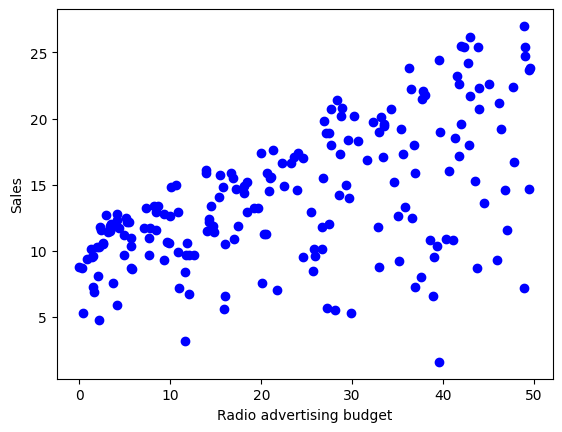

In [ ]:
plt.scatter(df.Budget, df.Sales, color="blue")
plt.xlabel('Radio advertising budget')
plt.ylabel('Sales')
plt.show()

Extraction des fonctionnalités (X) et des étiquettes (y)

In [ ]:

X = df[['Budget']]  # Features
y = df['Sales']     # Labels



Fractionnement des données en ensembles d'entraînement et de test (80% pour l'entraînement et 20% pour les tests)



In [ ]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))

In [ ]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

Création et entraînement du modèle de régression linéaire

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
a = model.a
b = model.b

In [ ]:
print(a,b)

0.1945010468343113 9.317820078317164


Prédiction sur l'ensemble des données

In [ ]:

predictions = model.predict(X)

Tracé du budget des dépenses publicitaires à la radio par rapport aux ventes réelles et prédites

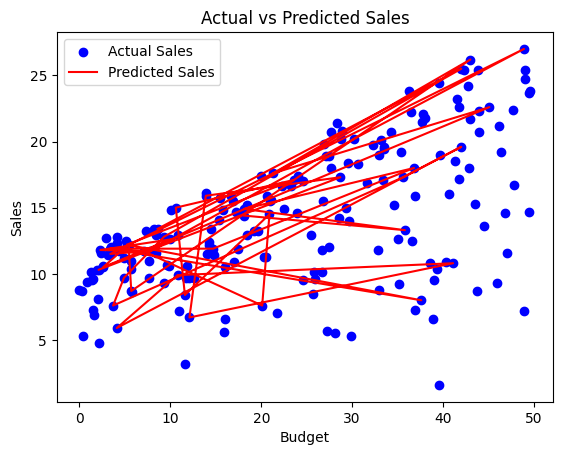

In [ ]:

plt.scatter(df['Budget'], df['Sales'], color='blue', label='Actual Sales')
plt.plot(X_test, y_test, color='red', label='Predicted Sales')
plt.xlabel('Budget')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

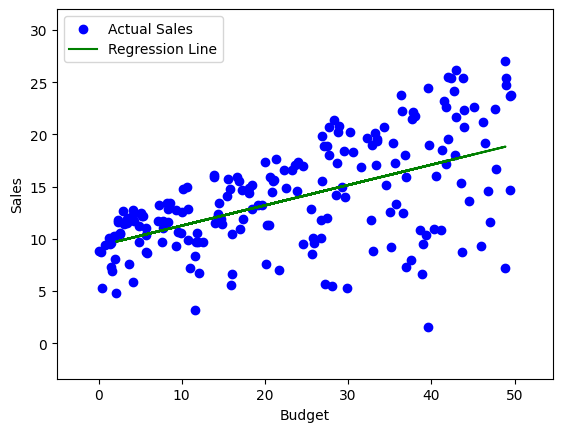

In [ ]:
# Plot budget versus actual and predicted sales
plt.scatter(df['Budget'], df['Sales'], color='blue', label='Actual Sales')

# Plot the regression line
plt.plot(X_test, a * X_test + b, color='green', label='Regression Line')

plt.xlabel('Budget')
plt.ylabel('Sales')
plt.title('')
plt.legend()

plt.axis([df['Budget'].min()-5, df['Budget'].max()+5, df['Sales'].min()-5, df['Sales'].max()+5])

plt.show()


Calcul du coefficient de détermination (R²) pour évaluer la performance du modèle

In [ ]:
from sklearn.metrics import r2_score

# Calculer le coefficient de détermination (R²)
r_squared = r2_score(X_test, y_test)
print("Coefficient de détermination (R²):", r_squared)

Coefficient de détermination (R²): 0.2741325741814985


Un coefficient de détermination (R²) de 0.274 indique que le modèle de régression linéaire explique environ 27.4% de la variation observée dans la variable cible (les ventes) à partir de la variable explicative (le budget alloué à la publicité à la radio).

**Interprétation :**

*   27.4% est une valeur relativement faible pour le R². Cela signifie que le modèle de régression linéaire avec uniquement le budget alloué à la publicité à la radio comme caractéristique explique seulement environ 27.4% de la variabilité des ventes. En d'autres termes, il existe d'autres facteurs non pris en compte par le modèle qui influent sur les ventes.

*  Cela peut indiquer que le modèle de régression linéaire utilisé est trop simpliste pour capturer la relation entre le budget publicitaire et les ventes, et qu'il peut être nécessaire d'inclure d'autres caractéristiques ou d'utiliser des modèles plus complexes pour améliorer la prédiction des ventes.

*   Par conséquent, bien que le modèle puisse fournir une certaine explication de la variation des ventes en fonction du budget publicitaire à la radio, il est important de se rappeler qu'il y a encore une grande part de la variation des ventes qui n'est pas expliquée par le modèle.









Ressources:

https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset/data

